# MSBA 326 _ Cannabis Monthly Tax Revenue: Analysis of Relevant Factors & Predictive Model


In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sms
import statsmodels.api as sm
import statistics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#

In [2]:
# Imporot dataset: Colorado Cannabis Economic
economic = pd.read_csv('~/Downloads/ColoradoCannabisEconomicData.csv')
economic.head()

,Unemployment,Zillow Home Index,SNAP,Labor Force Participation,FEDFUNDS,Leisure_Hospitality,Coincident_Economic_Activity_Index,Business Applications,AllEmployeesNonFarmPayroll,AvgHourlyWage,Revenue
0,5.8,263426.0,501889.0,67.8,0.07,295.8,116.18,5445.0,2428.0,26.20,3519755.0
1,5.6,264851.0,508211.0,67.8,0.08,297.6,116.81,5747.0,2435.7,26.39,4092575.0
2,5.4,266307.0,506461.0,67.8,0.09,298.9,117.46,5715.0,2445.8,26.35,4980992.0
3,5.2,267736.0,509949.0,67.8,0.09,300.0,118.08,5740.0,2453.2,26.24,5273355.0
4,5.0,269210.0,509157.0,67.7,0.10,299.6,118.71,5859.0,2460.8,26.39,5715707.0


In [3]:
economic['Date'] = pd.date_range(start='2014-02-01', end='2022-05-01', freq='MS')
economic = economic[['Date','Unemployment','Zillow Home Index','SNAP','Labor Force Participation','FEDFUNDS','Leisure_Hospitality','Coincident_Economic_Activity_Index','Business Applications','AllEmployeesNonFarmPayroll','AvgHourlyWage','Revenue']]
economic.head()

,Date,Unemployment,Zillow Home Index,SNAP,Labor Force Participation,FEDFUNDS,Leisure_Hospitality,Coincident_Economic_Activity_Index,Business Applications,AllEmployeesNonFarmPayroll,AvgHourlyWage,Revenue
0,2014-02-01,5.8,263426.0,501889.0,67.8,0.07,295.8,116.18,5445.0,2428.0,26.20,3519755.0
1,2014-03-01,5.6,264851.0,508211.0,67.8,0.08,297.6,116.81,5747.0,2435.7,26.39,4092575.0
2,2014-04-01,5.4,266307.0,506461.0,67.8,0.09,298.9,117.46,5715.0,2445.8,26.35,4980992.0
3,2014-05-01,5.2,267736.0,509949.0,67.8,0.09,300.0,118.08,5740.0,2453.2,26.24,5273355.0
4,2014-06-01,5.0,269210.0,509157.0,67.7,0.10,299.6,118.71,5859.0,2460.8,26.39,5715707.0


In [4]:
print('Histogram of all the variables')

Histogram of all the variables


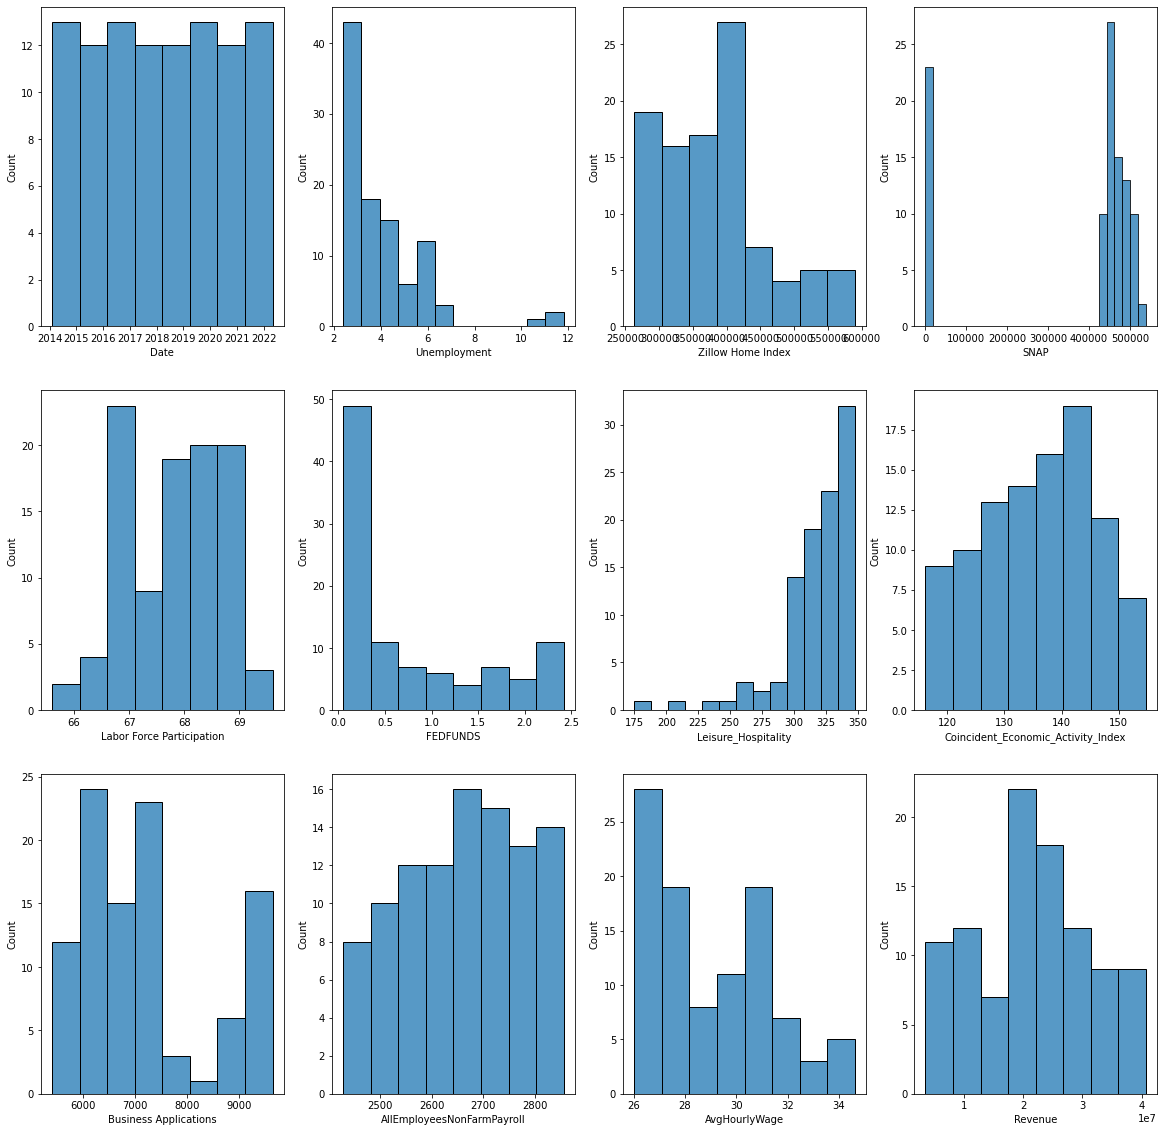

In [5]:
f, axes = plt.subplots(3,4, figsize=(20,20))
for ax, feature in zip(axes.flat, economic.columns):
    sns.histplot(economic[feature],ax=ax)

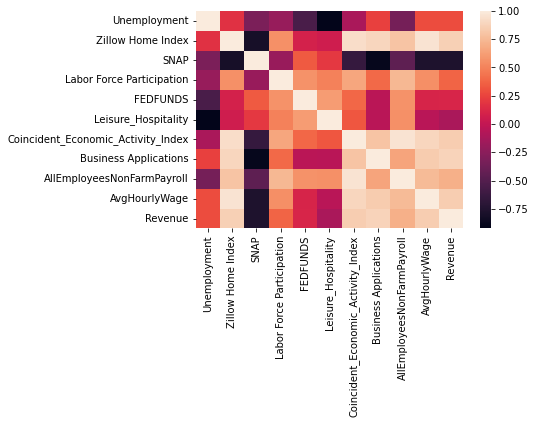

In [6]:
# HeatMap for all the variables
plt.figure() 
df = economic[['Unemployment','Zillow Home Index','SNAP','Labor Force Participation','FEDFUNDS','Leisure_Hospitality','Coincident_Economic_Activity_Index','Business Applications','AllEmployeesNonFarmPayroll','AvgHourlyWage','Revenue']]
corMat = df.corr(method='pearson')
sns.heatmap(corMat)
plt.show()

In [7]:
#Convert Date from object to time series
economic.Date = pd.to_datetime(economic.Date)
economic.set_index('Date', inplace=True)
economic.head()

,Unemployment,Zillow Home Index,SNAP,Labor Force Participation,FEDFUNDS,Leisure_Hospitality,Coincident_Economic_Activity_Index,Business Applications,AllEmployeesNonFarmPayroll,AvgHourlyWage,Revenue
Date,,,,,,,,,,,
2014-02-01,5.8,263426.0,501889.0,67.8,0.07,295.8,116.18,5445.0,2428.0,26.20,3519755.0
2014-03-01,5.6,264851.0,508211.0,67.8,0.08,297.6,116.81,5747.0,2435.7,26.39,4092575.0
2014-04-01,5.4,266307.0,506461.0,67.8,0.09,298.9,117.46,5715.0,2445.8,26.35,4980992.0
2014-05-01,5.2,267736.0,509949.0,67.8,0.09,300.0,118.08,5740.0,2453.2,26.24,5273355.0
2014-06-01,5.0,269210.0,509157.0,67.7,0.10,299.6,118.71,5859.0,2460.8,26.39,5715707.0


Text(0.5, 1.0, 'Exploratory Data of Colorado Cannabis Economic')

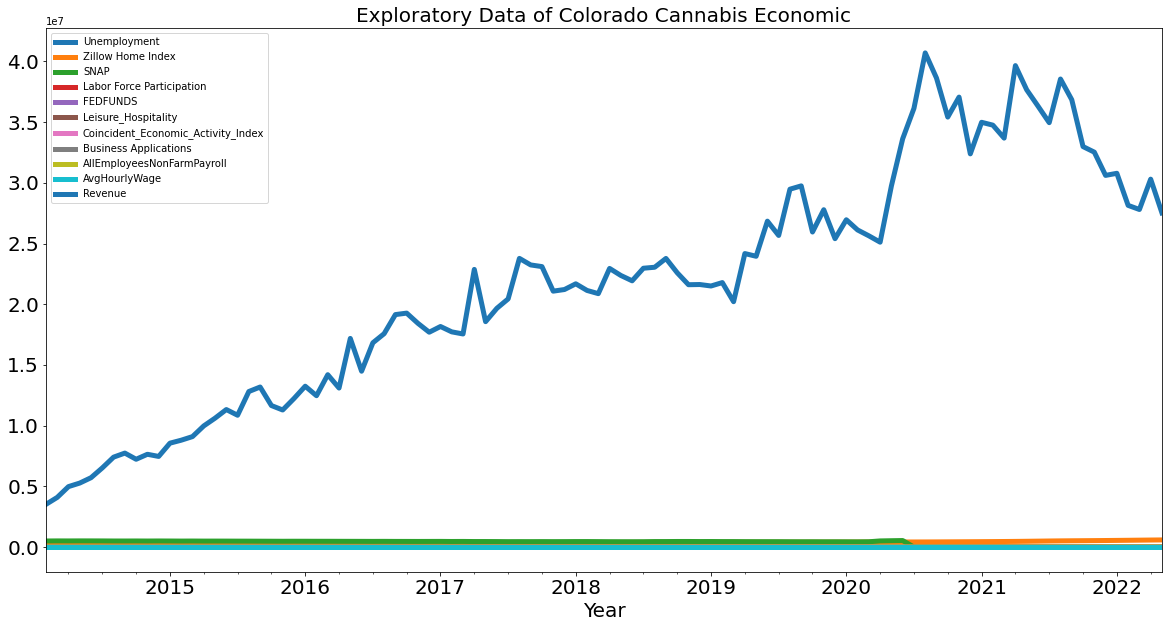

In [8]:
#Plotting Exploratory Data Analysis
economic.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Exploratory Data of Colorado Cannabis Economic", fontsize=20)

Text(0.5, 1.0, 'Colorado Monthly Cannabis Unemployment')

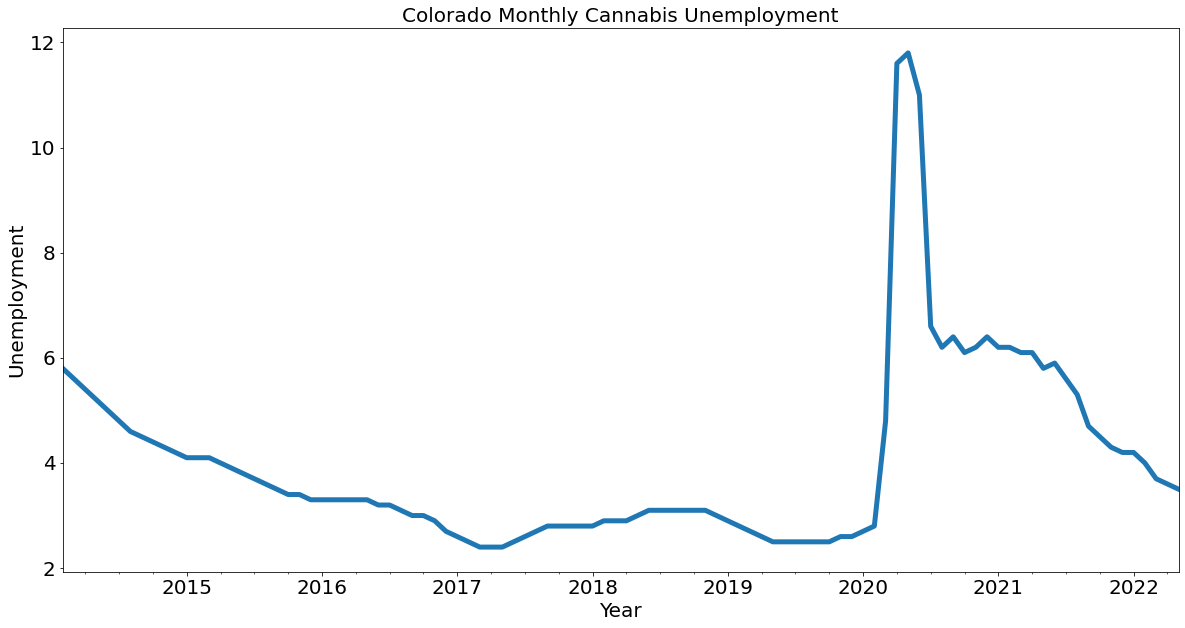

In [21]:
#Trends in Time Series:Plotting Unemployment
economic.Unemployment.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Unemployment', fontsize=20)
plt.title("Colorado Monthly Cannabis Unemployment", fontsize=20)

Text(0.5, 1.0, 'Colorado Monthly Cannabis Zillow Home Index')

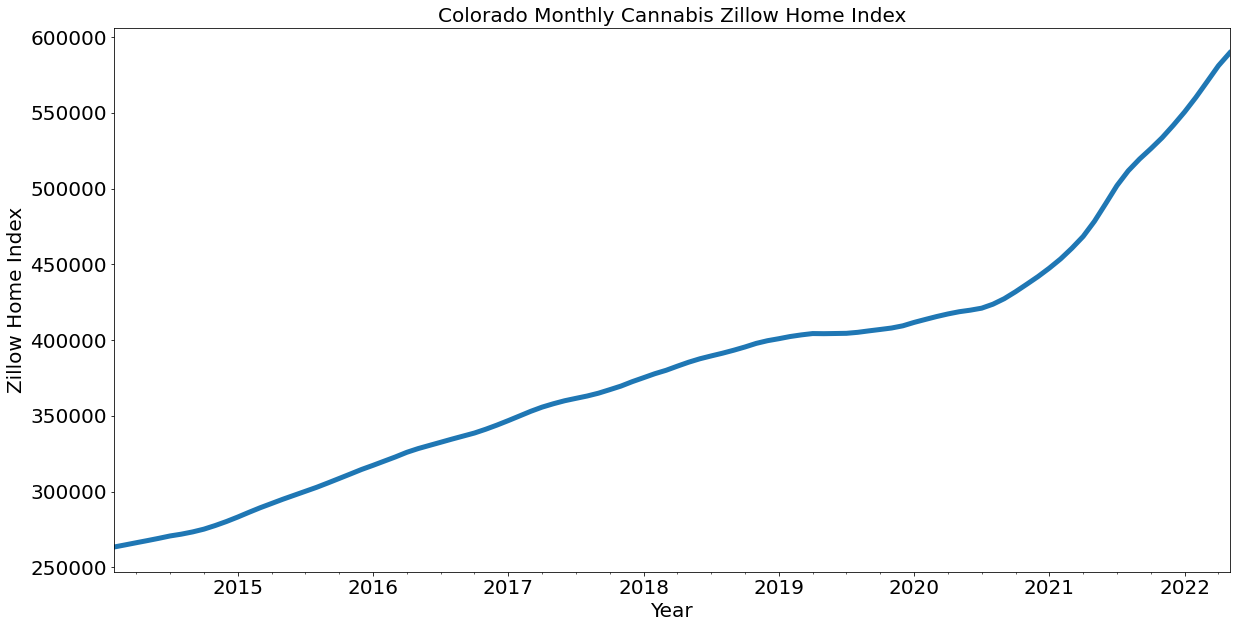

In [22]:
#Trends in Time Series:Plotting Zillow Home Index
economic['Zillow Home Index'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Zillow Home Index', fontsize=20)
plt.title("Colorado Monthly Cannabis Zillow Home Index", fontsize=20)

Text(0.5, 1.0, 'Colorado Monthly Cannabis Labor Force Participation')

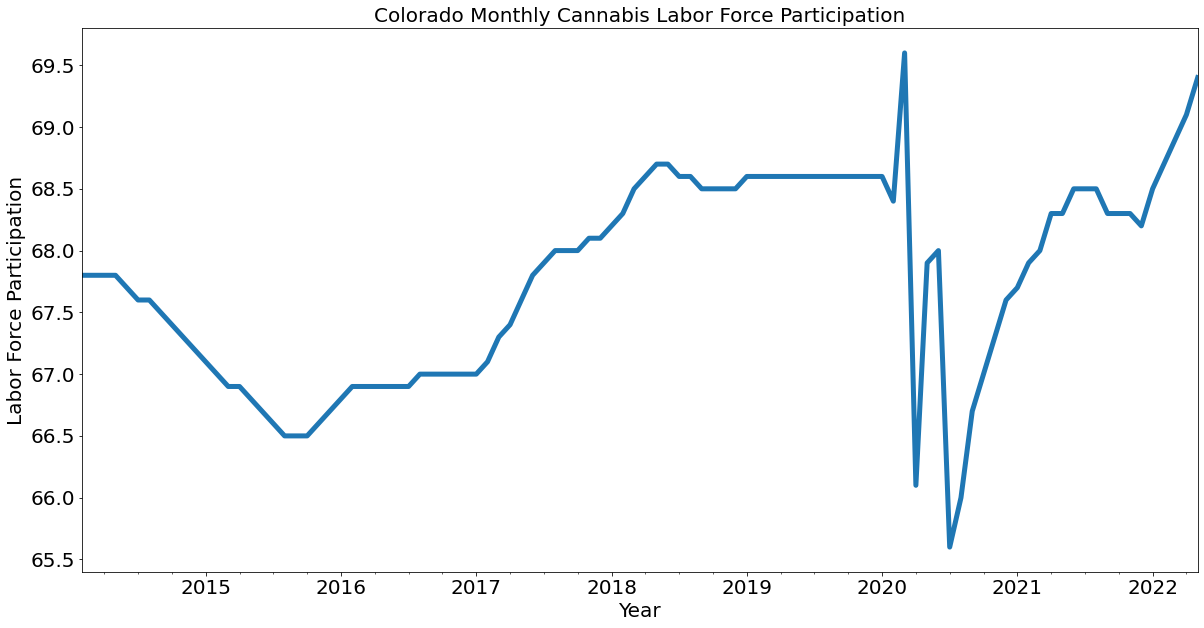

In [23]:
#Trends in Time Series:Plotting Labor Force Participation
economic['Labor Force Participation'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Labor Force Participation', fontsize=20)
plt.title("Colorado Monthly Cannabis Labor Force Participation", fontsize=20)

Text(0.5, 1.0, 'Colorado Monthly Cannabis Avg Hourly Wage')

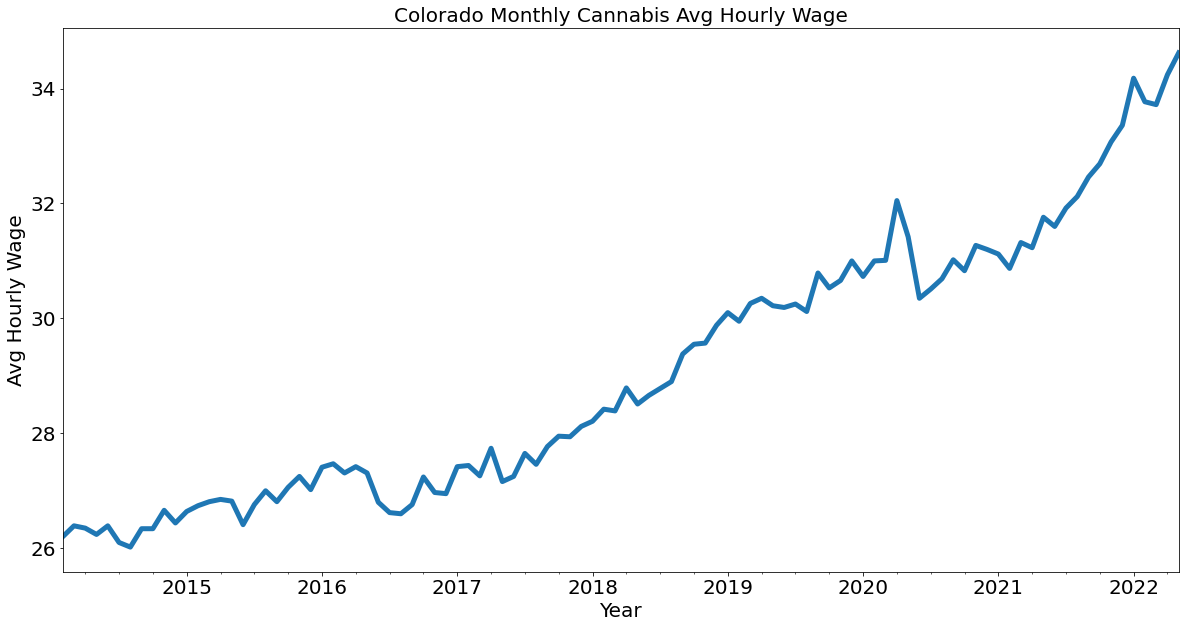

In [24]:
#Trends in Time Series:Plotting Avg Hourly Wage
economic['AvgHourlyWage'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Avg Hourly Wage', fontsize=20)
plt.title("Colorado Monthly Cannabis Avg Hourly Wage", fontsize=20)

Text(0.5, 1.0, 'Colorado Monthly Cannabis Revenue')

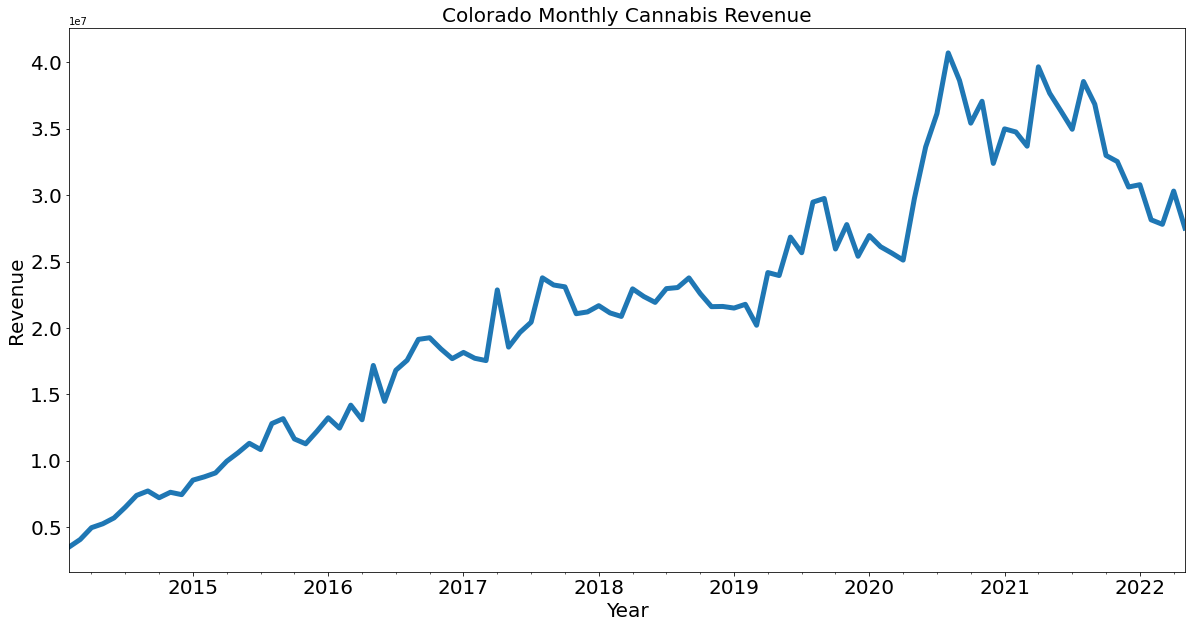

In [25]:
#Trends in Time Series:Plotting Revenue
economic['Revenue'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Revenue', fontsize=20)
plt.title("Colorado Monthly Cannabis Revenue", fontsize=20)

Text(0.5, 1.0, 'Seasonal Patterns in Time Series of Colorado Cannabis Economic')

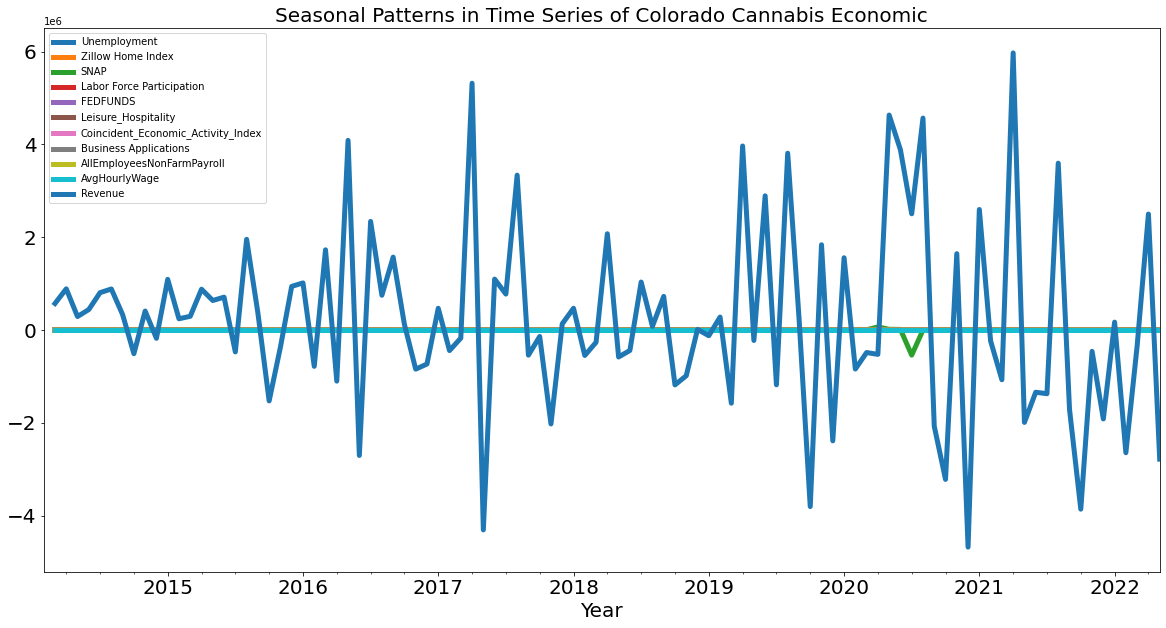

In [20]:
#Seasonal Patterns in Time Series
economic.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Seasonal Patterns in Time Series of Colorado Cannabis Economic", fontsize=20)

Text(0.5, 1.0, 'Colorado Time Series Cannabis in Unemployment')

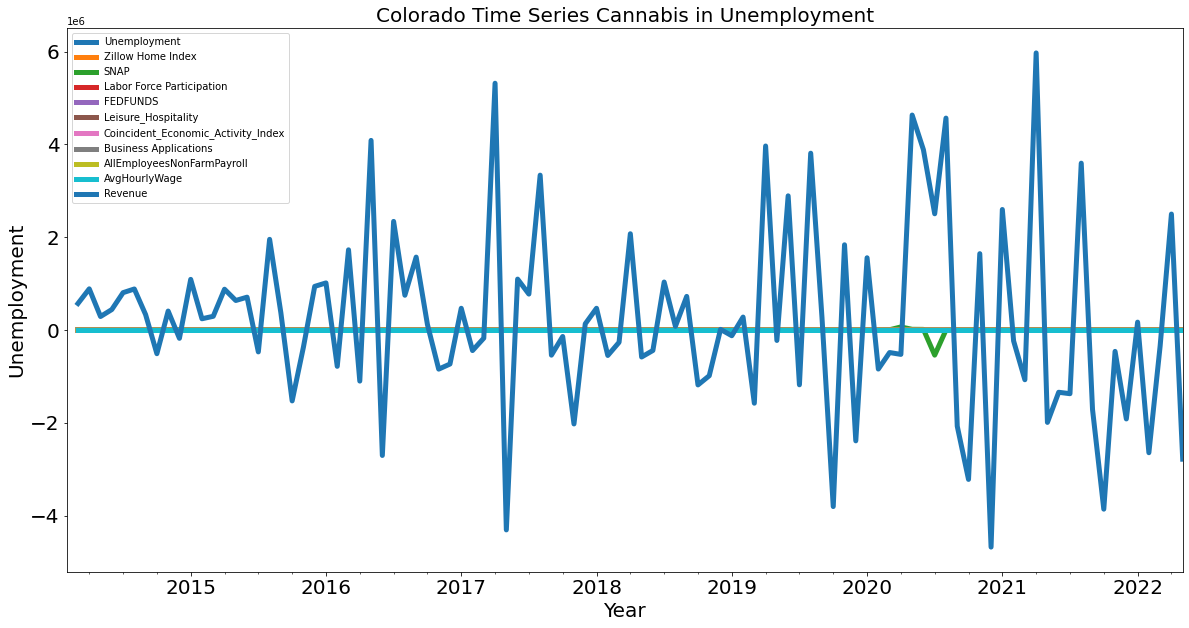

In [26]:
#Seasonal Patterns in Time Series
economic.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Unemployment', fontsize=20)
plt.title("Colorado Time Series Cannabis in Unemployment", fontsize=20)